## Module 2: Regression

In [66]:
import pandas as pd
import numpy as np

### 2.2: Data Preparation

In [67]:
df = pd.read_csv("../data/car_price.csv")

In [68]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [69]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [70]:
cat_cols = list(df.dtypes[df.dtypes == "object"].index)
for c in cat_cols:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [71]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


### 2.3: EDA

In [72]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

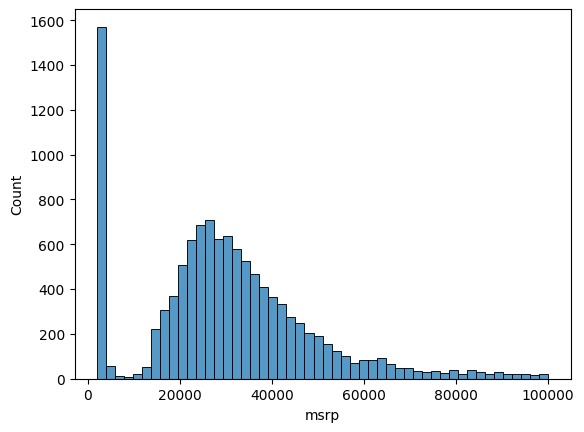

In [74]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [75]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [76]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [77]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

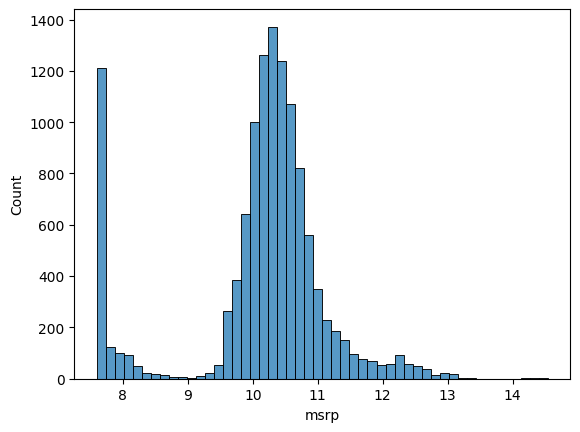

In [78]:
sns.histplot(price_logs, bins=50)

In [79]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4: Validation Framework

In [80]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [81]:
n, n_train, n_val, n_test

(11914, 7150, 2382, 2382)

In [82]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [83]:
idx = np.arange(n)

np.random.seed(3)
np.random.shuffle(idx)

In [84]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [85]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8929,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870,2500
8806,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549,2000
7233,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26,2000
3535,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259,283900
8763,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,21499


In [86]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [87]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [88]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [89]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

In [90]:
len(y_train)

7150

### 2.5: Linear Regression

In [91]:
df_train.iloc[10]

make                            toyota
model                           sienna
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels          all_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         23
city_mpg                            16
popularity                        2031
Name: 10, dtype: object

In [92]:
xi = [266, 16, 2031]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [93]:
def linreg(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [94]:
linreg(xi)

14.532

In [95]:
y_train[10]

np.float64(10.6699084287665)

In [96]:
np.expm1(14.532)

np.float64(2047232.6484084243)

In [97]:
np.log1p(2047232.6484084243)

np.float64(14.532)

### 2.6: Linear Regression Vector

In [98]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [99]:
def linreg(xi):
    return w0 + dot(xi, w)

In [100]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [101]:
def linreg(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [102]:
linreg(xi)

14.532

In [103]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [104]:
def linreg(X):
    return X.dot(w_new)

In [105]:
linreg(X)

array([12.38 , 13.552, 12.312])

### 2.7: Training linear regression model

In [106]:
X = [
        [148, 24, 1385],
        [132, 25, 2031],
        [453, 11, 86],
        [158, 24, 185],
        [172, 25, 201],
        [413, 11, 86],
        [38,  54, 185],
        [142, 25, 431],
        [453, 31, 86]
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [107]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [108]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(25844.754055766767),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [109]:
def train_linreg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [110]:
train_linreg(X, y)

(np.float64(25844.754055766767),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

### 2.8: Car Price Baseline Model

In [111]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [112]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
X_train = df_train[base].fillna(0).values
w0, w = train_linreg(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [113]:
w0, w, y_pred

(np.float64(7.997791089440886),
 array([ 9.38137552e-03, -1.48981699e-01,  1.48986791e-02,  1.29814906e-02,
        -1.50934207e-05]),
 array([ 9.60046631,  9.02370071,  9.82236895, ...,  9.0922238 ,
         9.80649519, 10.0229472 ], shape=(7150,)))

<Axes: ylabel='Count'>

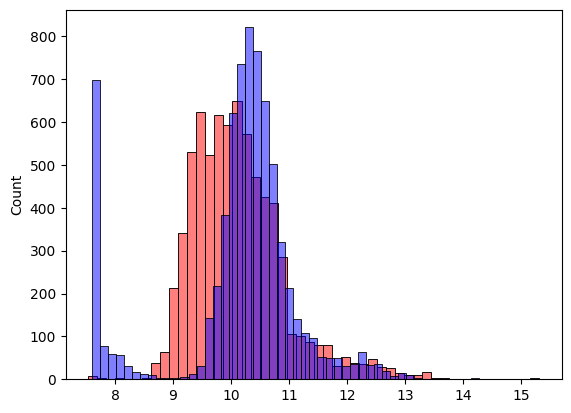

In [114]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

### 2.9: RMSE

In [115]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [116]:
rmse(y_train, y_pred)

np.float64(0.7530702635167188)

### 2.10: Validating the model

In [117]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [118]:
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7460612947996879)

### 2.11: Simple Feature Engineering

In [119]:
def prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [121]:
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5123851644442666)

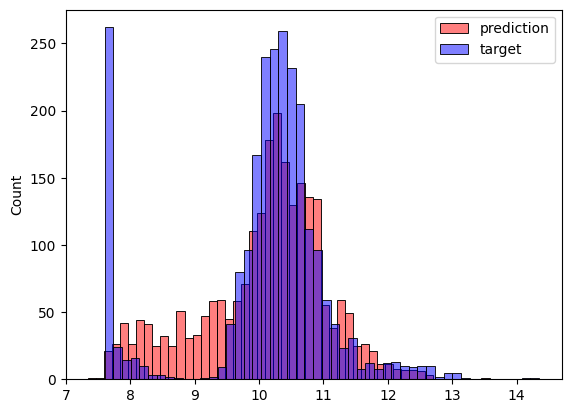

In [122]:
sns.histplot(y_pred, label="prediction", color="red", alpha=0.5, bins=50)
sns.histplot(y_val, label="target", color="blue", alpha=0.5, bins=50)
plt.legend()

### 2.12: Categorical Variables

In [127]:
cat_col_names = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style'
]
cat_cols = {}
for c in cat_col_names:
    cat_cols[c] = list(df_train[c].value_counts().head().index)
    
cat_cols

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [206]:
def prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")

    for n, v in cat_cols.items():
        for value in v:
            df[f"{n}_{value}"] = (df[n] == value).astype(int)
            features.append(f"{n}_{value}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [131]:
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(126.76637832933731)

In [132]:
X_train

array([[190.,   5.,  24., ...,   0.,   0.,   0.],
       [105.,   4.,  25., ...,   0.,   0.,   0.],
       [225.,   6.,  26., ...,   0.,   0.,   0.],
       ...,
       [114.,   4.,  26., ...,   0.,   0.,   0.],
       [160.,   4.,  39., ...,   0.,   0.,   0.],
       [260.,   6.,  24., ...,   0.,   0.,   0.]], shape=(7150, 41))

In [133]:
w0, w

(np.float64(-4709399742402570.0),
 array([-5.74270214e-02,  8.15983565e+01,  5.97730074e+00,  1.06843632e+01,
        -2.81767596e-03,  3.52743537e+00, -9.75973995e+02, -9.29673703e+02,
        -9.56755353e+02,  2.32324410e+01,  5.16930742e+01, -3.97649103e+01,
         4.83619988e+00,  2.05947571e+01, -4.40324310e+01,  2.09855903e+01,
         3.01525879e+00,  4.44574854e+01, -4.18335539e+01,  7.87955532e+02,
         8.04866291e+02,  8.58385632e+02,  8.00055394e+02,  1.10154274e+03,
         4.70939974e+15,  4.70939974e+15,  4.70939974e+15,  4.70939974e+15,
        -2.39534667e+01,  1.37614590e+01,  6.08150188e+00, -4.43938468e+01,
        -1.08307459e+01, -2.48067881e+00, -2.41051125e+01, -2.69014455e+01,
        -1.37052637e-01, -4.12188470e-02,  1.91588723e-01,  4.00488697e-01,
        -2.49912262e-01]))

### 2.13: Regularization

In [143]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001],
]
X = np.array(X)
X

array([[4.      , 4.      , 4.      ],
       [3.      , 5.      , 5.      ],
       [5.      , 1.      , 1.      ],
       [5.      , 4.      , 4.      ],
       [7.      , 5.      , 5.      ],
       [4.      , 5.      , 5.000001]])

In [135]:
y = [1, 2, 3, 1, 2, 3]

In [144]:
XTX = X.T.dot(X)
XTX

array([[140.      , 111.      , 111.000004],
       [111.      , 108.      , 108.000005],
       [111.000004, 108.000005, 108.00001 ]])

In [146]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.13029882e-02, -6.18460955e+04,  6.18460502e+04],
       [-6.18460947e+04,  1.40737501e+12, -1.40737488e+12],
       [ 6.18460494e+04, -1.40737488e+12,  1.40737475e+12]])

In [147]:
XTX_inv.dot(X.T).dot(y)

array([ 4.14130492e-01, -1.76437237e+06,  1.76437228e+06])

In [148]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX = np.array(XTX)

In [149]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [151]:
XTX = XTX + 0.01 * np.eye(3)
XTX

array([[1.02     , 2.       , 2.       ],
       [2.       , 1.02     , 1.0000001],
       [2.       , 1.0000001, 1.02     ]])

In [152]:
np.linalg.inv(XTX)

array([[ -0.34009026,   0.33672302,   0.33672302],
       [  0.33672302,  24.91426063, -25.08598937],
       [  0.33672302, -25.08598937,  24.91426063]])

In [153]:
def train_linreg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [157]:
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train, r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.46859353751970756)

### 2.14: Tuning the model

In [158]:
for r in (0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10):
    X_train = prepare_X(df_train)
    w0, w = train_linreg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 -4709399742402570.0 126.76637832933731
1e-05 5.852364125271475 0.4597127526582685
0.0001 7.209576168729845 0.45971271004143704
0.001 7.158250585197425 0.45971226695443856
0.1 6.980051606458704 0.45967389939457465
1 6.106810992669961 0.45982545008745235
10 4.704790979725895 0.46859353751970756


In [160]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train, r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.45971226695443856)

### 2.15: Using the model

In [162]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [164]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[190.,   5.,  24., ...,   0.,   0.,   0.],
       [105.,   4.,  25., ...,   0.,   0.,   0.],
       [225.,   6.,  26., ...,   0.,   0.,   0.],
       ...,
       [330.,   6.,  26., ...,   0.,   0.,   0.],
       [134.,   4.,  18., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(9532, 41))

In [165]:
y_full_train = np.concatenate([y_train, y_val])

In [167]:
w0, w = train_linreg(X_full_train, y_full_train, r=0.001)

In [170]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.459466086901109)

In [172]:
car = df_test.iloc[21].to_dict()
car

{'make': 'lexus',
 'model': 'gs_300',
 'year': 2006,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 245.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 27,
 'city_mpg': 19,
 'popularity': 454}

In [174]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,lexus,gs_300,2006,premium_unleaded_(required),245.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,27,19,454


In [176]:
X_small = prepare_X(df_small)
X_small

array([[245.,   6.,  27.,  19., 454.,  11.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.]])

In [177]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.085041232073124)

In [178]:
np.expm1(y_pred)

np.float64(23980.578019648045)

In [179]:
np.expm1(y_test[21])

np.float64(43149.99999999996)

### 2.16: Adding 5 more features

In [185]:
cat_col_names = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style'
]
cat_cols = {}
for c in cat_col_names:
    cat_cols[c] = list(df[c].value_counts().head(10).index)
    
cat_cols

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible',
  'tacoma',
  'gti',
  'frontier',
  'beetle',
  'accord'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style'

In [205]:
def prepare_X_new(df):
    df = df.copy()

    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")

    for n, v in cat_cols.items():
        for val in v:
            df[f"{n}_{v}"] = (df[n] == val).astype(int)
            features.append(f"{n}_{v}")

    df_num = df[features].fillna(0)
    X = df_num.values

    return X

In [194]:
def train_linreg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [200]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linreg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5089856898556595)

In [207]:
car = df_test.iloc[51].to_dict()
df_car = pd.DataFrame([car])

X_car = prepare_X_new(df_car)
car_pred = w0 + X_car.dot(w)

np.expm1(car_pred), np.expm1(y_test[51])

(array([41078.04595665]), np.float64(42400.00000000001))

In [208]:
car = df_test.iloc[51].to_dict()
df_car = pd.DataFrame([car])

X_car = prepare_X(df_car)
car_pred = w0 + X_car.dot(w)

np.expm1(car_pred), np.expm1(y_test[51])

(array([40046.25856808]), np.float64(42400.00000000001))